# Selecting sources
## Observability study of the 150 sources of the 1BIGB selection of the 2WHSP catalogue with MAGIC.

In [2]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u
#import astropy.units as u
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.pyplot import axes
import datetime
import matplotlib.dates as mdates
from matplotlib import rcParams
import ephem
from datetime import datetime, timedelta, date, time
import math
import timeit
from astropy.coordinates import get_moon
from astropy.coordinates import get_sun
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

### In order to rule out some of the 150 sources we obtain their maximum altitude in the year 2018 and remove those that peak below 40 degrees.

The proceeding here is the same as the one in the file BIGB_trial_year.ipynb, which has comments

In [2]:
table  = open('table.txt', 'r')
lines=table.readlines()
Names=[]
for x in lines:  
    Names.append(x.split('&')[0])
table.close()


In [3]:
RA=np.load('RA.npy')
DEC=np.load('DEC.npy')

In [40]:
# define MAGIC Location
MAGIC = EarthLocation(lat=28.76194*u.deg, lon=-17.89*u.deg, height=2200*u.m)
utcoffsetSummer = +1*u.hour
utcoffsetWinter = 0*u.hour 

In [6]:
midnight = Time('2017-12-31 00:00:00') + utcoffsetWinter
delta_midnight = np.linspace(0,525600,17520)*u.min
times = midnight + delta_midnight
days = np.split(times,365)

In [7]:
# MAGIC Horizontal Coordinate system
altazframe = AltAz(obstime=times, location=MAGIC)


In [8]:
# Moon's position in it
moonaltazs = get_moon(times).transform_to(altazframe)



In [9]:
# Sun's position in it
sunaltazs = get_sun(times).transform_to(altazframe)

In [10]:
BIGB = []
for i in range(len(Names)):
    BIGB.append(SkyCoord(ra=RA[i]*u.degree, dec=DEC[i]*u.degree, frame='icrs'))


150
[<SkyCoord (ICRS): (ra, dec) in deg
    ( 2.45708, -43.28056)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 3.37,  9.825)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 3.86625,  35.61083)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 7.36917,  20.8925)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 10.44583, -47.02667)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 14.56958,  17.38694)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 15.71208, -20.03278)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 18.75708, -34.0075)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 21.73833,  33.125)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 25.17, -7.98028)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 30.27542,  0.56667)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 31.05375, -33.56111)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 33.02375, -25.96611)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 33.07, -2.36528)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 34.13333,  23.24722)>, <SkyCoord (ICRS): (ra, dec) in deg
    ( 35.20167, -8.7138

In [76]:
#TAKES FOREVER, NO NEED TO RUN IT AGAIN

start = timeit.default_timer()

x = range(150)
BIGB_altazs = [BIGB[i].transform_to(altazframe) for i in x]
stop = timeit.default_timer()
print 'Computational time: '
print stop - start, ' s'
print BIGB_altazs[1].alt

Computational time: 
911.901444912  s
[u'15d06m31.0206s' u'8d32m27.4841s' u'2d01m13.3434s' ..., u'28d30m31.1447s'
 u'21d55m20.4757s' u'15d19m55.2185s']


In [24]:
start = timeit.default_timer()

x = range(150)
#comprehension
max_list = [max(BIGB_altazs[i].alt) for i in x]

stop = timeit.default_timer()
print 'Computational time: '
print stop - start, ' s'

Computational time: 
46.8638141155  s


In [25]:
start = timeit.default_timer()

x = range(150)
#comprehension
max_list = [max_list[i].value for i in x]

stop = timeit.default_timer()
print 'Computational time: '
print stop - start, ' s'

Computational time: 
0.000473976135254  s


We arrive to a list of the maximum altitudes in the year period and remove those that peak below 40.

In [27]:
for i in range(150):
    if max_list[i]<40:
        max_list[i]=0

In [28]:
print max_list
np.count_nonzero(max_list)

[  0.          71.16768068  83.05315094  82.23554165   0.          78.72687873
  41.30631275   0.          85.54650495  53.35229927  61.89475875   0.           0.
  58.95999527  84.57148551  52.6095831   68.25602527   0.          84.00986756
  67.21865034  60.4089679   78.11000813   0.          67.63882334   0.
  72.71859481  65.71756282   0.           0.          57.50563869   0.           0.
   0.           0.           0.           0.          76.35346636
  57.05586092   0.          50.01296068  51.32212056   0.           0.           0.
   0.          54.9554622    0.           0.          44.04873148
  41.01675105   0.           0.          89.27302717  83.54360945
  74.54119003  62.63325698  72.17841951  79.08015008  76.14540555
  62.75893346  51.17089866  87.73888272   0.          66.20397028
  71.866337    43.80182169  43.81890356  83.0038803   51.19667014
  48.19094218  77.57836417  62.04871896  68.70314399  59.7039443
  61.24829786   0.          40.51774361   0.          51.4

107

Now we can use a list of the 107 indexes of the interesting sources.

In [57]:
list107 = np.nonzero(max_list)
list107=np.asarray(list107)
print list107
isinstance(list107, np.ndarray)


[[  1   2   3   5   6   8   9  10  13  14  15  16  18  19  20  21  23  25
   26  29  36  37  39  40  45  48  49  52  53  54  55  56  57  58  59  60
   61  63  64  65  66  67  68  69  70  71  72  73  74  76  78  79  80  81
   82  83  84  85  87  88  89  90  91  92  93  94  97  99 101 102 103 104
  105 106 107 108 109 112 113 114 115 116 117 118 119 120 121 122 124 125
  126 127 128 129 131 134 135 136 138 139 140 141 142 143 146 148 149]]


True

In [81]:
x = range(150)
BIGB_alt=[BIGB_altazs[i].alt for i in x]
print len(BIGB_alt)
print BIGB_alt[1]
print len(BIGB_alt[1])
17520/2

150
[u'15d06m31.0206s' u'8d32m27.4841s' u'2d01m13.3434s' ..., u'28d30m31.1447s'
 u'21d55m20.4757s' u'15d19m55.2185s']
17520


8760

In [88]:
list107=np.array([1 ,  2  , 3  , 5 ,  6 ,  8 ,  9 , 10 , 13 , 14 , 15 , 16 , 18 , 19 , 20 , 21 , 23 , 25
,  26,  29,  36,  37 , 39 , 40  ,45  ,48  ,49 , 52,  53, 54 , 55 , 56 , 57 , 58 , 59,  60,
  61,  63,  64,  65,  66,  67 , 68,  69,  70,  71,  72,  73 , 74,  76,  78,  79,  80,  81,
  82,  83 , 84 , 85 , 87 , 88,  89,  90,  91,  92 , 93 , 94,  97 , 99, 101, 102, 103, 104,
 105, 106, 107 ,108, 109, 112, 113, 114 ,115 ,116 ,117, 118, 119, 120, 121, 122, 124 ,125,
 126, 127, 128, 129, 131, 134, 135, 136, 138, 139, 140, 141, 142, 143, 146, 148,149])

##  Due to the high computational time required, the files with the aforementioned list and the altitudes of all sources were saved and can be found in the repository. 

In [11]:
BIGB_alt=np.load('BIGB_alt.npy')
list107=np.load('list107.npy')

In [13]:
BIGB_alt107=[BIGB_alt[i] for i in list107]


In [90]:
#np.save('BIGB_altazs.alt',BIGB_alt)
#np.save('list107', list107)

In [14]:
x = range(107)
BIGB_alt107=[np.asarray(BIGB_alt107[i]) for i in x]
BIGB_alt107=np.asarray(BIGB_alt107)

Now we take into account the visibility constraints of the Sun (must be below -18 degrees) and for the Moon we just consider - for now - the times when it is below the horizon. Note that the real number for the observable hours will be higher than this.

In [16]:
year = np.linspace(0,365,365)*u.day
BIGB_alt107_mat =np.zeros((17520,107))
for i in range(107):
    BIGB_alt107_mat[:,i]=BIGB_alt107[i]


In [18]:
for i in range(17520):
        if sunaltazs[i].alt>-18*u.deg:
                for j in range(107):
                    BIGB_alt107_mat[i,j]=0

In [22]:
for i in range(17520):
        if moonaltazs[i].alt>0*u.deg:
                for j in range(107):
                    BIGB_alt107_mat[i,j]=0

In [21]:
for i in range(17520):
      for j in range(107):
            if  BIGB_alt107_mat[i,j]<20:
                BIGB_alt107_mat[i,j]=0

The angle ranges considered are 
$[h_1, h_2, h_3, h_4] = [20-28 \deg, 28-40, 40-55, 55-85]$ accounting from the ground. 


In [24]:
h=np.zeros((4,107))
for i in range(17520):
      for j in range(107):
            if  BIGB_alt107_mat[i,j]>20 and BIGB_alt107_mat[i,j]<28:
                h[0,j]=h[0,j]+1
            elif BIGB_alt107_mat[i,j]>28 and BIGB_alt107_mat[i,j]<40:
                h[1,j]=h[1,j]+1
            elif BIGB_alt107_mat[i,j]>40 and BIGB_alt107_mat[i,j]<55:
                h[2,j]=h[2,j]+1
            elif BIGB_alt107_mat[i,j]>55 and BIGB_alt107_mat[i,j]<85:
                h[3,j]=h[3,j]+1
h=h/2

## Now we can store the hours in a (4,107) matrix where each column contains data of one of the 107 sources, and the rows represent the hours in each angle range as described above.

In [3]:
h=np.load('HOURSMOON.npy')

In [5]:
print h[:,21]
print sum(h[:,21])
print h[:,1]
print sum(h[:,1])
print h

[ 158.5  240.   392.5  175.5]
966.5
[  95.5  136.5  170.5  382.5]
785.0
[[  81.5   95.5   83.5   84.   113.5   94.    93.    85.5   90.    84.
    94.    83.    92.    85.5   88.    96.5   87.    85.5   89.    93.5
    86.   158.5   98.    95.    98.5  116.   123.5   93.5  102.5   87.5
   144.   120.5   92.    90.    90.5  100.5   94.5  125.    85.5  114.
   310.    93.    99.   231.    84.5   87.   118.    85.5   79.5  116.5
    91.   106.5  104.    79.5   81.    87.5   90.5   89.5   82.5   97.
    82.5   85.5   77.5   77.5   78.5  134.    80.5   81.5  121.5   85.
    93.5   98.5   97.5   77.5   78.    98.    96.    88.5   92.5   86.5
   132.    82.   108.5   86.    81.5  170.    84.   106.    82.5   85.5
   122.5  191.5   87.5  111.    84.    80.5   87.5   91.5  100.5   93.5
    86.5   83.5   93.    97.5   94.    87.5  105. ]
 [ 127.   136.5  128.5  127.   269.5  134.5  157.5  137.5  144.5  130.
   164.   132.5  139.5  136.5  141.5  150.   133.   132.5  133.   144.5
   126.5  240.   

## This table can be better visualized as a histogram where the number of observable hours is depicted for each angle range. Note that the angles start from the groud and not the zenith.

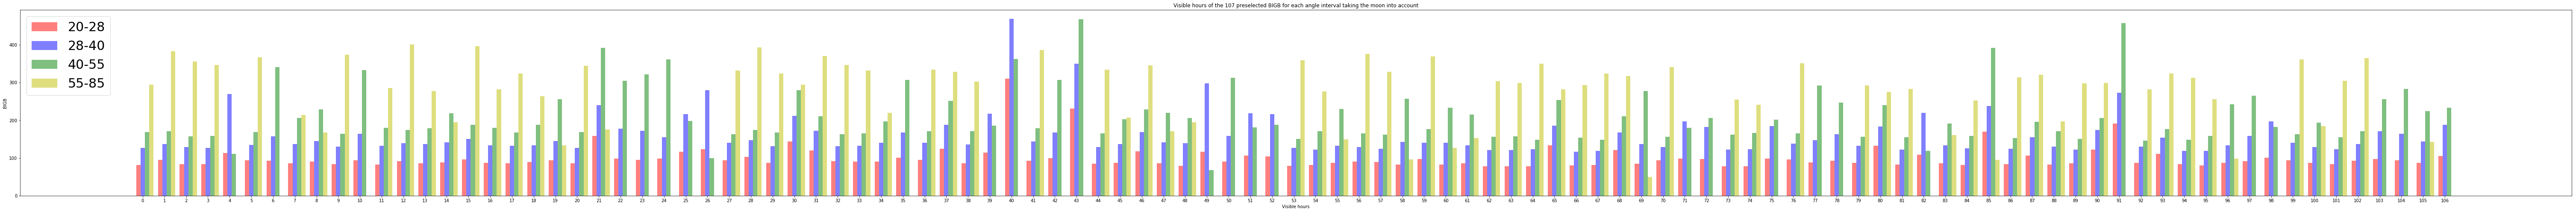

In [6]:

#fig, ax = plt.subplots()
fig3 = plt.figure(figsize=(107,8))

index = np.arange(107)
bar_width = 0.2

opacity = 0.5


rects4 = plt.bar(index - bar_width, h[0,:], bar_width,alpha=opacity, color='r',label='20-28')


rects1 = plt.bar(index, h[1,:], bar_width, alpha=opacity, color='b', label='28-40')

rects2 = plt.bar(index + bar_width, h[2,:], bar_width,  alpha=opacity,color='g', label='40-55')
rects3 = plt.bar(index + 2*bar_width, h[3,:], bar_width, alpha=opacity,  color='y', label='55-85')


plt.xlabel('Visible hours')
plt.ylabel('BIGB')
plt.title("Visible hours of the 107 preselected BIGB for each angle interval taking the moon into account")
plt.xticks(range(107))
plt.legend(loc=2, prop={'size': 30})
#plt.legend(loc=1, prop={'size': 30})

#plt.tight_layout()
plt.show()

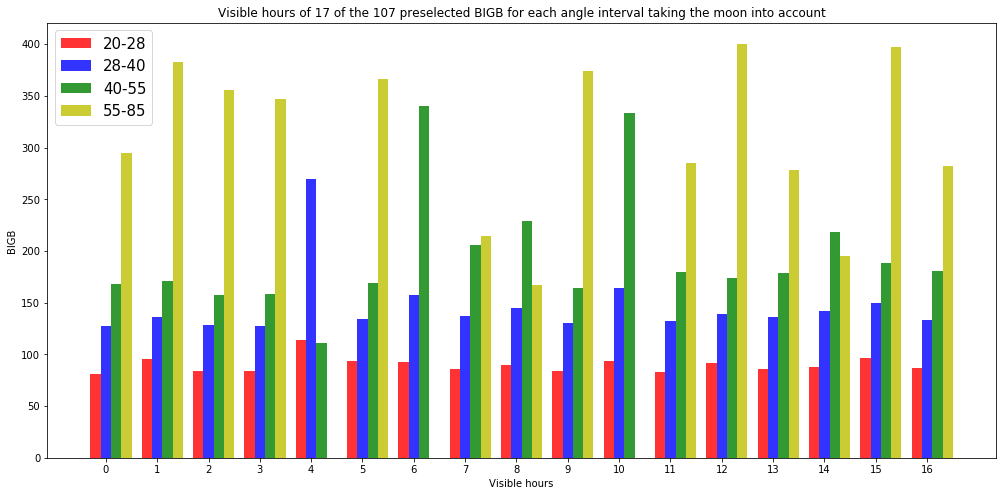

In [10]:

#fig, ax = plt.subplots()
fig5 = plt.figure(figsize=(17,8))

index = np.arange(17)
bar_width = 0.2

opacity = 0.8


rects4 = plt.bar(index - bar_width, hMOON[0,0:17], bar_width,alpha=opacity, color='r',label='20-28')


rects1 = plt.bar(index, hMOON[1,0:17], bar_width, alpha=opacity, color='b', label='28-40')

rects2 = plt.bar(index + bar_width, hMOON[2,0:17], bar_width,  alpha=opacity,color='g', label='40-55')
rects3 = plt.bar(index + 2*bar_width, hMOON[3,0:17], bar_width, alpha=opacity,  color='y', label='55-85')


plt.xlabel('Visible hours')
plt.ylabel('BIGB')
plt.title("Visible hours of 17 of the 107 preselected BIGB for each angle interval taking the moon into account")
plt.xticks(range(17))
plt.legend(loc=2, prop={'size': 15})
#plt.legend(loc=1, prop={'size': 30})

#plt.tight_layout()
plt.show()